In [1]:
import os
import sys
root = os.path.split(os.getcwd())[0]
if root not in sys.path:
    sys.path.append(root)
!{sys.executable} -m pip install numpy pandas intervaltree matplotlib



You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
from strategy.data import RawData
from strategy.primitives import Pool, Token, Fee
pool = Pool(Token.WBTC, Token.WETH, Fee.MIDDLE)
raw = RawData.from_pool(pool)

Done


,c,c_inv,vol0,vol1,l,vol,fee
block_time,,,,,,,
2021-05-16,12.973269,0.077082,784.921404,9423.818249,44452.666464,19606.814747,588.204442
2021-05-17,13.124226,0.076195,1345.954261,15406.918300,50545.645960,33071.526166,992.145785
2021-05-18,12.918687,0.077407,655.194065,13429.094426,71337.996650,21893.341437,656.800243
2021-05-19,13.921964,0.071829,3230.769793,30632.441526,42079.316311,75611.103418,2268.333103
2021-05-20,14.955749,0.066864,1541.413298,25217.638908,29156.532918,48270.628640,1448.118859


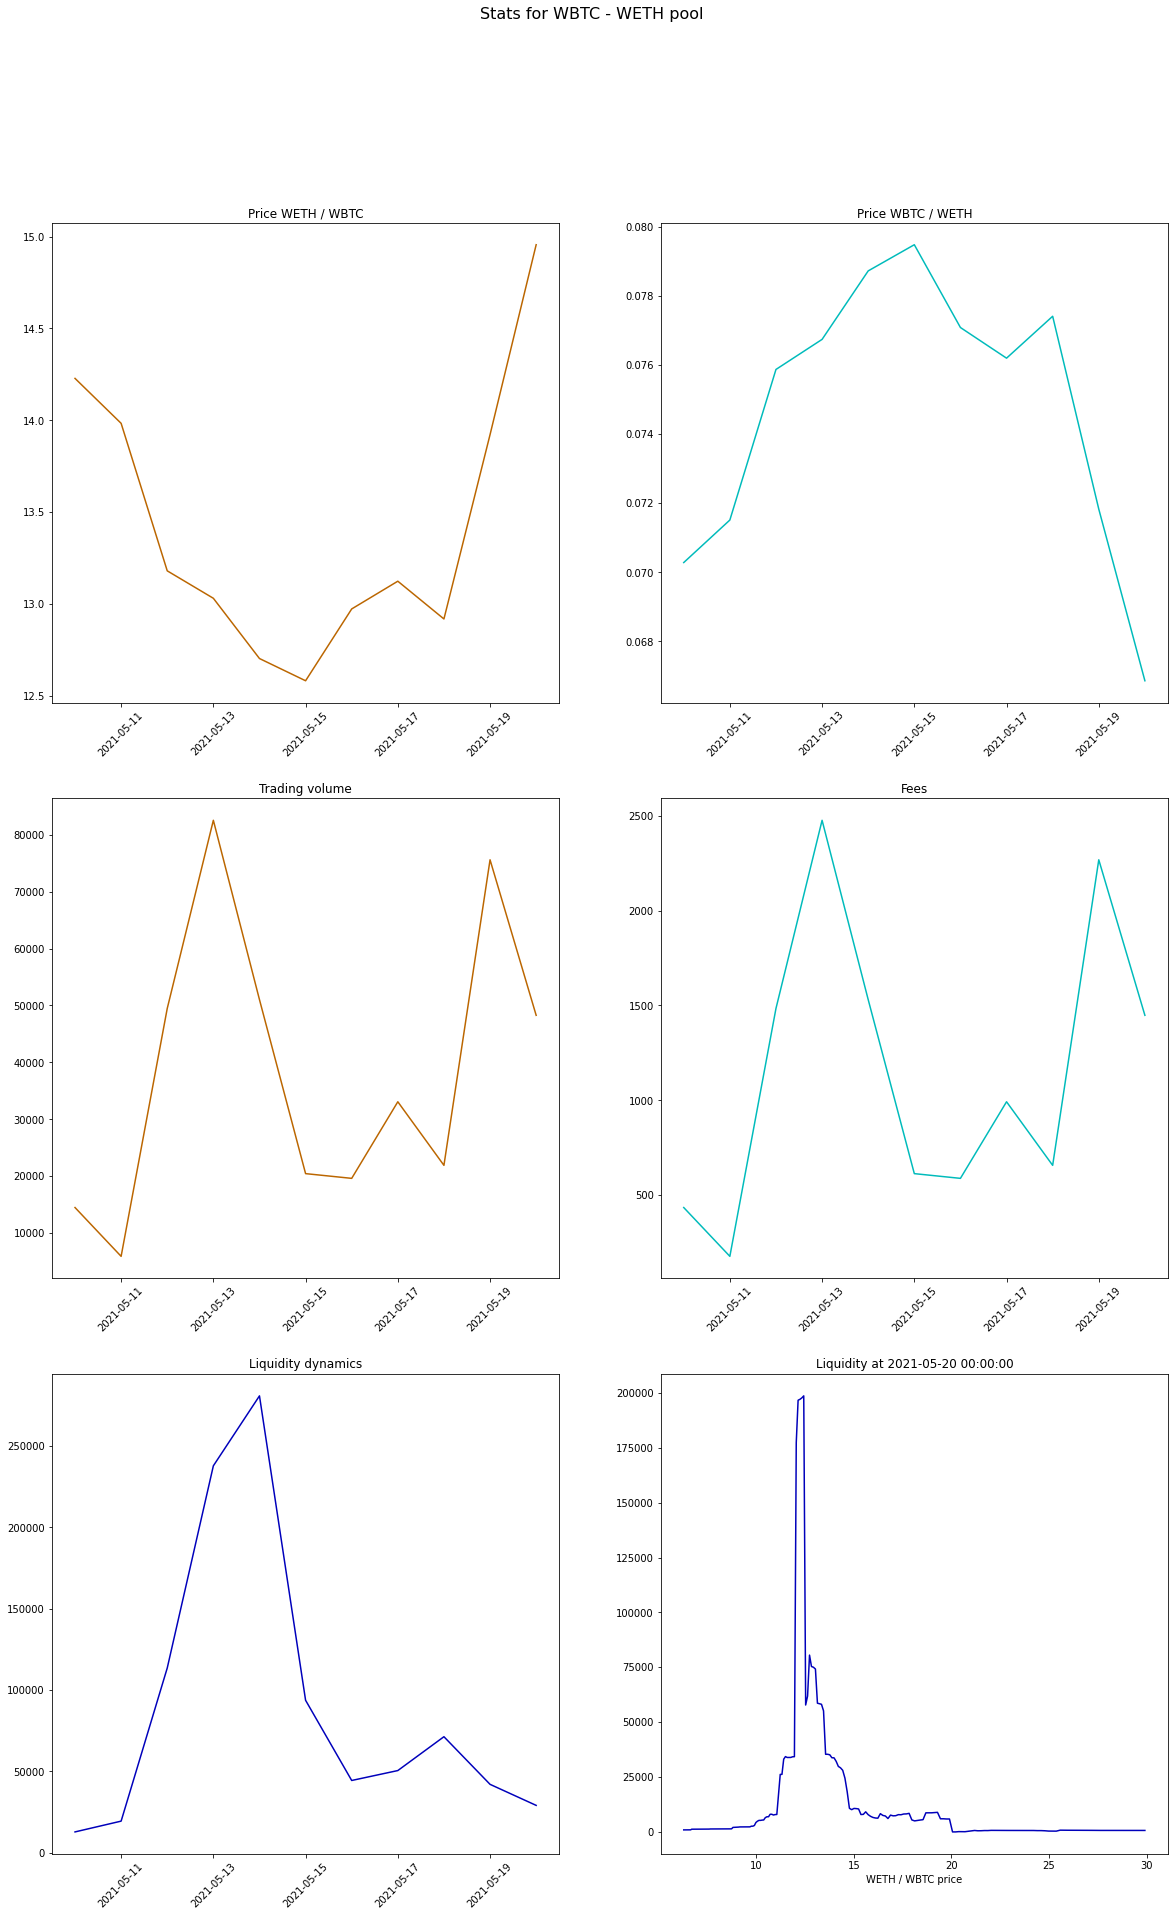

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from strategy.primitives import Pool, Frequency
from strategy.data import PoolData

p = PoolData.from_raw_data(raw, Frequency.DAY)
display(p.data().tail())
p.plot()


In [4]:
from strategy.portfolio import AbstractStrategy, Position
from strategy.backtest import Backtest
from strategy.data import PoolData
from datetime import datetime
from typing import Callable

class RebalanceStrategy(AbstractStrategy):        
    def rebalance(
        self,
        t: datetime,
        c: float,
        vol: float,
        l: Callable[[float], float],
        pool_data: PoolData,
    ):
        c = prices[t]
        if not self.portfolio().position("main"):
            self.portfolio().add_position(Position(id="main", a = c / 1.0001, b = c * 1.0001))
            pos = self.portfolio().position("main")
            print(c, 1)
            pos.deposit(c, 1)
        else:
            pos = self.portfolio().position("main")
            pos.set_a(c / 1.0001, c)
            pos.set_b(c * 1.0001, c)

from time import time
# t = time()
# backtest = Backtest(RebalanceStrategy())
# backtest.run(p)
# print(time() - t)
# backtest.plot(20, 50)
i = p.data().index[0]
p.data().loc[i]


c        16.058620
c_inv     0.062272
vol0      0.001864
vol1      0.000000
l         3.456692
vol       0.029931
fee       0.000898
Name: 2021-05-04 00:00:00, dtype: float64